In [18]:
# uploading the images that I have chosen with their internet addresses
!wget "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgSsp2O3OzI2VSfGK-2z2xSBUSPkuPpmMcpTCoaEmQGbiWSTrlI7SuImLtb0b6D0kBD6Jd3fPt7_EXoqWgKDctpRqexNjplK5lLaIGzXpuA8ArIKZskD6OAR0w9iqO0i1Y25miFTljYlV3PY01MATesfx8kJN3nV6EJvSs4Lf0bemekBtfG4Kny0qINTw/s400/cat.jpg"
!wget "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhawnGt77G972vxCbUmqILQy695oBBeLZCxtlXUfxcnGHef-UA0l-2R8pqFVA6zRwhHBwz5a1A13lLUkeR4xXdrTr29x-TVNsumVcmLQtGZ2890Jw46yKbDF1hVlB99bNEpNGOgMOKalwOG7n1wQxgxnsHDU8Tvf3tsbeyRu5Zgg-HFiRrkWbU7bD_xdg/s400/mask.png"
!wget "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiP_CezgyQS9U96gLlh_EAFwbAOwD6HazTx3LuKS5KXsV5pEvnZN9llZP8w3M7FuPBrqTuWFcbq_0YDXngnTmFDFv2aerwN4Tt7FxeyRBwQhzeEC_eR-matSYSlHWhvNEoe7IfiQ-KwH3SAzBCZ7U9recmzJ9vatt1Fsbf5yG-A9EZa_RbdRu9gyTRnCA/s1134/space.jpg"


--2023-04-09 14:44:53--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgSsp2O3OzI2VSfGK-2z2xSBUSPkuPpmMcpTCoaEmQGbiWSTrlI7SuImLtb0b6D0kBD6Jd3fPt7_EXoqWgKDctpRqexNjplK5lLaIGzXpuA8ArIKZskD6OAR0w9iqO0i1Y25miFTljYlV3PY01MATesfx8kJN3nV6EJvSs4Lf0bemekBtfG4Kny0qINTw/s400/cat.jpg
Resolving blogger.googleusercontent.com (blogger.googleusercontent.com)... 173.194.214.132, 2607:f8b0:400c:c0b::84
Connecting to blogger.googleusercontent.com (blogger.googleusercontent.com)|173.194.214.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12629 (12K) [image/jpeg]
Saving to: ‘cat.jpg.3’

cat.jpg.3           100%[===================>]  12.33K  --.-KB/s    in 0s      

2023-04-09 14:44:53 (108 MB/s) - ‘cat.jpg.3’ saved [12629/12629]

--2023-04-09 14:44:54--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhawnGt77G972vxCbUmqILQy695oBBeLZCxtlXUfxcnGHef-UA0l-2R8pqFVA6zRwhHBwz5a1A13lLUkeR4xXdrTr29x-TVNsumVcmLQtGZ2890Jw46yKbDF1hVlB99bNEpNGOgMOKalwOG7n1wQxgxnsH

In [19]:
import cv2                                        # importing the needed classes to show and process the images 
from matplotlib import pyplot as plt  

fgImg = cv2.imread('cat.jpg')                     # reading foreground image 
fgImg = cv2.cvtColor(fgImg, cv2.COLOR_BGR2RGB)    # converting it from BGR to RBG

fgMask = cv2.imread('mask.png')                   # reading foreground image's mask
fgMask = cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB)  # converting it from BGR to RBG

bgImg = cv2.imread('space.jpg')                   # reading background image 
bgImg = cv2.cvtColor(bgImg, cv2.COLOR_BGR2RGB)    # converting it from BGR to RBG


In [20]:
# defining a method that helps to combine images
def combineForegroundBackground(fgImg, fgMask, bgImg, topLeft):

  subtracted = cv2.subtract(fgImg, fgMask)                  # subtracting the mask from the foreground
  subtracted = cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB)  # converting it from BGR to RBG 

  kedi = cv2.subtract(fgImg, subtracted)                    # subtracting the subtracted from the foreground to get the cat alone     
  kedi = cv2.cvtColor(kedi, cv2.COLOR_BGR2RGB)              # converting it from BGR to RBG

  newImg = bgImg                                            # creating a new image that we will store the combined image 
  newImg = cv2.cvtColor(newImg, cv2.COLOR_BGR2RGB)          # converting it from BGR to RBG
                                                            
  x = topLeft[0]                                            # x & y will help to iterate over the new image
  y = topLeft[1]                                            #  
  i = 0                                                     # i & j will help to iterate over the cat image
  j = 0

  while(x < (len(bgImg)) and i < len(kedi)):                # since the images are also 2D arrays this nested for loop will help us to
    while(y < (len(bgImg[0])) and j < len(kedi[0])):        # iterate over the images (first x axis, then y axis)
      if(any(subtracted[i][j]) == False):                   # if the subtracted image's pixel is empty
          newImg[x][y] = kedi[i][j]                         # then add cat image to the new image
      y = y + 1
      j = j + 1                                             # in the inner loop increase y & j by 1
    x = x + 1                                               
    i = i + 1                                               # in the outer loop increase x & i by 1
    y = topLeft[1]
    j = 0                                                   # in the outer loop set x & j to the base numbers
    
  return newImg                                             # after combining two images return the new image


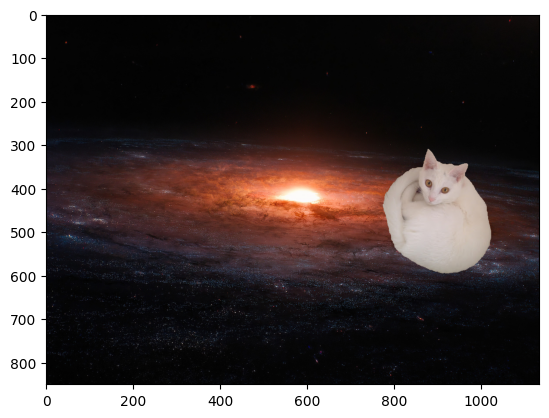

In [21]:
topLeft = [300,700]               # defining where top left of the foreground should lay on the background

newImg1 = combineForegroundBackground(fgImg, fgMask, bgImg, topLeft)   # creating combined image with calling the method
newImg1 = cv2.cvtColor(newImg1, cv2.COLOR_BGR2RGB)                      # converting it from BGR to RBG

plt.imshow(newImg1)                # showing the new image on the screen
plt.show()

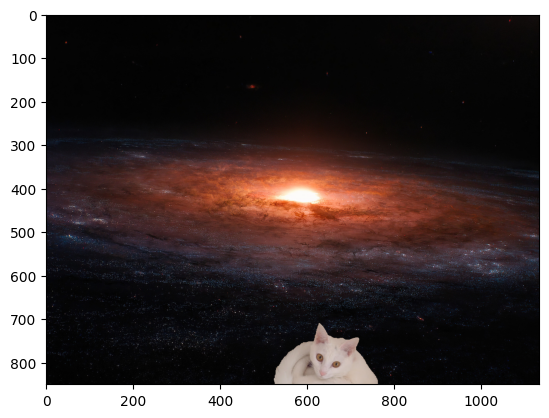

In [22]:
topLeft = [700,450]               # defining where top left of the foreground should lay on the background

newImg2 = combineForegroundBackground(fgImg, fgMask, bgImg, topLeft)   # creating combined image with calling the method
newImg2 = cv2.cvtColor(newImg2, cv2.COLOR_BGR2RGB)                      # converting it from BGR to RBG

plt.imshow(newImg2)                # showing the new image on the screen
plt.show()

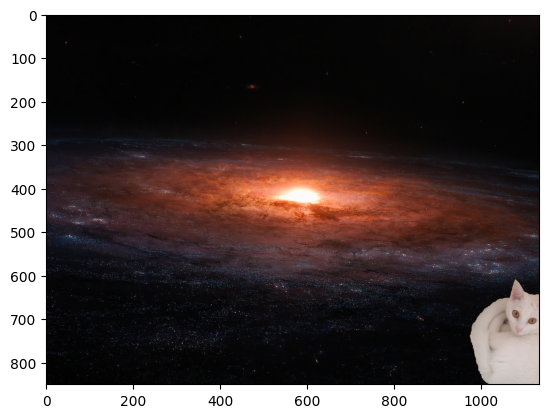

In [23]:
topLeft = [600,900]               # defining where top left of the foreground should lay on the background

newImg3 = combineForegroundBackground(fgImg, fgMask, bgImg, topLeft)   # creating combined image with calling the method
newImg3 = cv2.cvtColor(newImg3, cv2.COLOR_BGR2RGB)                      # converting it from BGR to RBG

plt.imshow(newImg3)                # showing the new image on the screen
plt.show()